In [55]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pandas
import numpy as numpy
import os
import matplotlib.pyplot as matplot
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import itertools
from IPython.display import Image  
from sklearn import tree
from os import system
numpy.random.seed(1234)
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
os.chdir("C:\\Siddhartha\\Personal Documents\\BOK\\AIML\\Un Supervised Learning")

In [138]:
def plot_confusion_matrix(Y_test,Y_predict, target_names,title='Confusion matrix',cmap=None,normalize=True):
    cm = metrics.confusion_matrix(Y_test, Y_predict)
    accuracy = numpy.trace(cm) / float(numpy.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = matplot.get_cmap('Blues')

    matplot.figure(figsize=(8, 6))
    matplot.imshow(cm, interpolation='nearest', cmap=cmap)
    matplot.title(title)
    matplot.colorbar()

    if target_names is not None:
        tick_marks = numpy.arange(len(target_names))
        matplot.xticks(tick_marks, target_names, rotation=45)
        matplot.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, numpy.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            matplot.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            matplot.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    matplot.tight_layout()
    matplot.ylabel('True label')
    matplot.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    matplot.show()
    print(metrics.classification_report(Y_test, Y_predict))
    model_performance = [metrics.accuracy_score(Y_test, Y_predict),metrics.recall_score(Y_test, Y_predict,average=None),
                         metrics.precision_score(Y_test, Y_predict,average=None),metrics.f1_score(Y_test, Y_predict,average=None) ]
    accuracy_report = pandas.DataFrame(model_performance, columns=['Model_Performance'], 
                                   index=['Accuracy','Recall','Precision','f1_Score'])
    return accuracy_report
    
def EDA_Corr(df):
    corr = df.corr()
    index = corr.columns
    Output = []
    for i in range(0,len(index)):
        i = index[i]
        Pos = corr.index[(corr[i] >= 0.5)].tolist()
        No = corr.index[(corr[i] < 0.5) & (corr[i] > -0.6)].tolist()
        Neg = corr.index[(corr[i] <= -0.5)].tolist()
        leng_u = len(No)
        leng_pos = len(Pos)
        leng_neg = len(Neg)
        Out = [i, leng_u, leng_pos, leng_neg, Pos, Neg, No]
        Output.append(Out)
    fig, ax = matplot.subplots(figsize=(20,10))  
    sns.heatmap(corr,annot=True,vmin=-1,vmax=1,cmap='Blues', linewidths=0, ax = ax)
    Output1 = pandas.DataFrame(Output, columns= ['Feature','Uniqueness','Positive rel', 'inverse rel', 'Pos', 'Neg', 'No'])
    return Output1

def EDA(df):
    EDA = pandas.DataFrame((df.describe()).T)
    EDA["Kurtosis"] = df.kurtosis()
    EDA["Skewness"] = df.skew()
    EDA["Range"] = EDA['max'] -  EDA['min']
    EDA["IQR"] = EDA['75%'] -  EDA['25%']
    return EDA

def getAccuracy(testSet, predictions):
    #correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] is predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [3]:
Source = pandas.read_csv("iris.csv")
del Source['Id']
Source.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [4]:
Source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 5 columns):
SepalLengthCm    151 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     151 non-null float64
Species          152 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
Source.shape

(152, 5)

In [6]:
So = Source.iloc[:,0:3]
So.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm'], dtype='object')

In [7]:
So[~So.applymap(numpy.isreal).all(1)]

,SepalLengthCm,SepalWidthCm,PetalLengthCm


In [8]:
(Source.isnull()).sum()

SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [9]:
Source = Source.replace(numpy.nan, Source.median())

In [10]:
(Source.isnull()).sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [11]:
Source['Species'].value_counts()

Iris-virginica     52
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [12]:
Source = Source.replace('Iris-setosa',0)

In [13]:
Source = Source.replace('Iris-virginica',1)

In [14]:
Source = Source.replace('Iris-versicolor',2)

In [15]:
Source['Species'].value_counts()

1    52
2    50
0    50
Name: Species, dtype: int64

In [16]:
#Source['Species'] = pandas.Categorical(Source['Species'])

In [17]:
Source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 5 columns):
SepalLengthCm    152 non-null float64
SepalWidthCm     152 non-null float64
PetalLengthCm    152 non-null float64
PetalWidthCm     152 non-null float64
Species          152 non-null int64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [18]:
EDA = EDA(Source)

In [19]:
EDA

,count,mean,std,min,25%,50%,75%,max,Kurtosis,Skewness,Range,IQR
SepalLengthCm,152.0,5.843421,0.822584,4.3,5.1,5.80,6.4,7.9,-0.519305,0.316614,3.6,1.3
SepalWidthCm,152.0,3.053289,0.430757,2.0,2.8,3.00,3.3,4.4,0.335693,0.341112,2.4,0.5
PetalLengthCm,152.0,3.766447,1.754000,1.0,1.6,4.35,5.1,6.9,-1.379394,-0.288607,5.9,3.5
PetalWidthCm,152.0,1.203289,0.759698,0.1,0.3,1.30,1.8,2.5,-1.325991,-0.120165,2.4,1.5
Species,152.0,1.000000,0.813788,0.0,0.0,1.00,2.0,2.0,-1.489326,0.000000,2.0,2.0


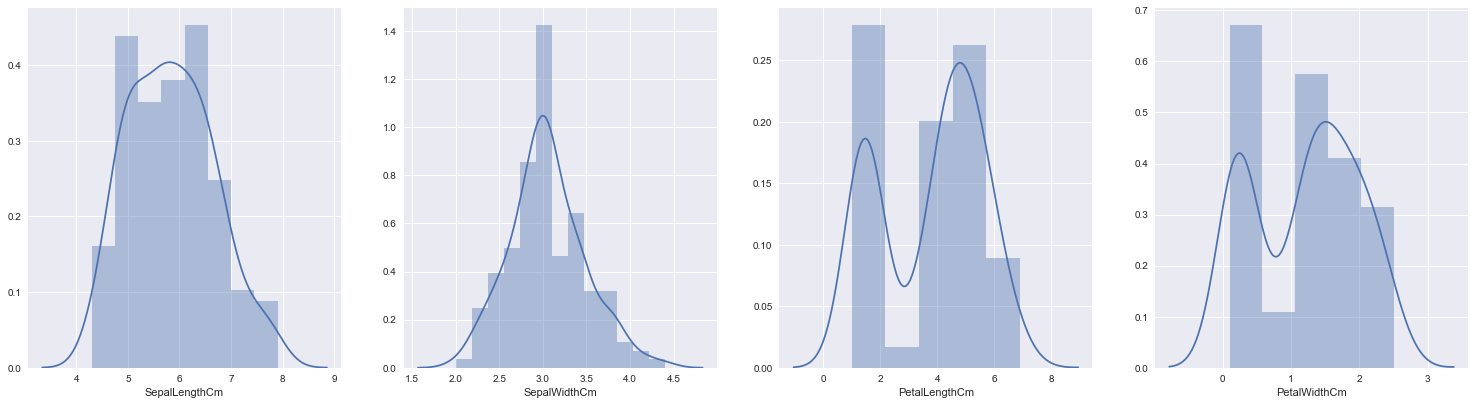

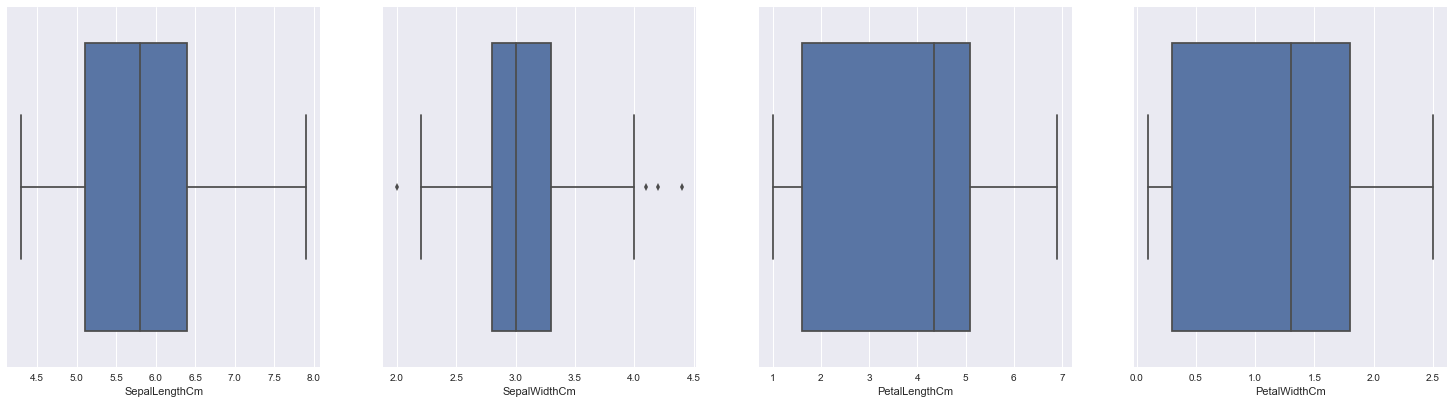

In [32]:
f, axes = matplot.subplots(1, 4, figsize=(10, 10))
sns.distplot(Source['SepalLengthCm'], ax = axes[0])
sns.distplot(Source['SepalWidthCm'], ax = axes[1])
sns.distplot(Source['PetalLengthCm'], ax = axes[2])
sns.distplot(Source['PetalWidthCm'], ax = axes[3])
matplot.subplots_adjust(top =  1.5, right = 10, left = 8, bottom = 1)

f, axes = matplot.subplots(1, 4, figsize=(10, 10))
sns.boxplot(Source['SepalLengthCm'], ax = axes[0])
sns.boxplot(Source['SepalWidthCm'], ax = axes[1])
sns.boxplot(Source['PetalLengthCm'], ax = axes[2])
sns.boxplot(Source['PetalWidthCm'], ax = axes[3])
matplot.subplots_adjust(top =  1.5, right = 10, left = 8, bottom = 1)

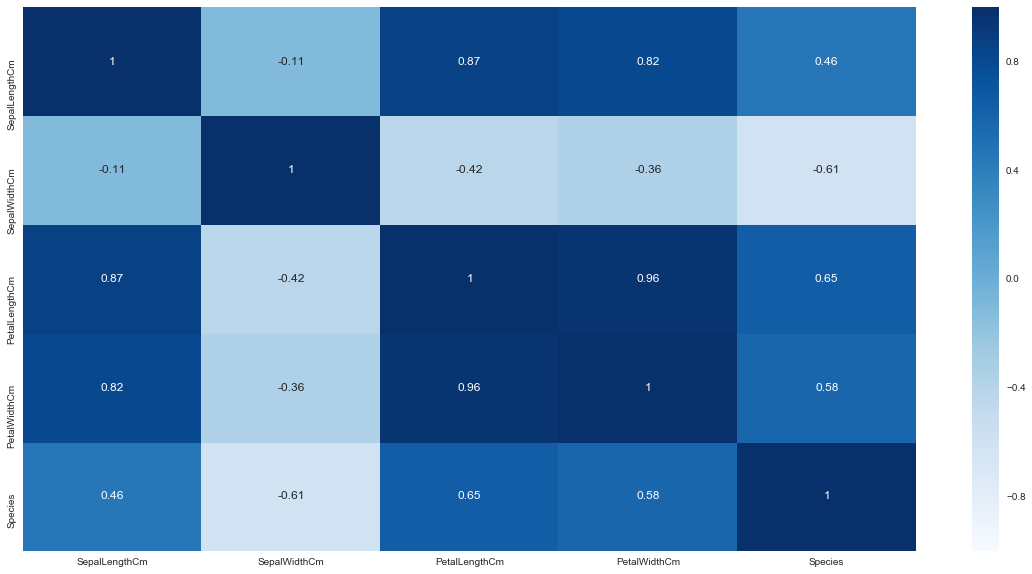

In [21]:
EDA_Corr_Results = pandas.DataFrame(EDA_Corr(Source))

In [22]:
EDA_Corr_Results

,Feature,Uniqueness,Positive rel,inverse rel,Pos,Neg,No
0,SepalLengthCm,2,3,0,"[SepalLengthCm, PetalLengthCm, PetalWidthCm]",[],"[SepalWidthCm, Species]"
1,SepalWidthCm,3,1,1,[SepalWidthCm],[Species],"[SepalLengthCm, PetalLengthCm, PetalWidthCm]"
2,PetalLengthCm,1,4,0,"[SepalLengthCm, PetalLengthCm, PetalWidthCm, S...",[],[SepalWidthCm]
3,PetalWidthCm,1,4,0,"[SepalLengthCm, PetalLengthCm, PetalWidthCm, S...",[],[SepalWidthCm]
4,Species,1,3,1,"[PetalLengthCm, PetalWidthCm, Species]",[SepalWidthCm],[SepalLengthCm]


In [24]:
Source.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871120,0.815986,0.460028
SepalWidthCm,-0.109369,1.000000,-0.420713,-0.356510,-0.612102
PetalLengthCm,0.871120,-0.420713,1.000000,0.962043,0.648618
PetalWidthCm,0.815986,-0.356510,0.962043,1.000000,0.579519
Species,0.460028,-0.612102,0.648618,0.579519,1.000000


No variables found that are in the specified range -0.1 to +0.1 to be dropped

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [27]:
Source.var()

SepalLengthCm    0.676645
SepalWidthCm     0.185552
PetalLengthCm    3.076516
PetalWidthCm     0.577141
Species          0.662252
dtype: float64

No variables found that has variance <0.1

## Question 6

*Plot the scatter matrix for all the variables.*

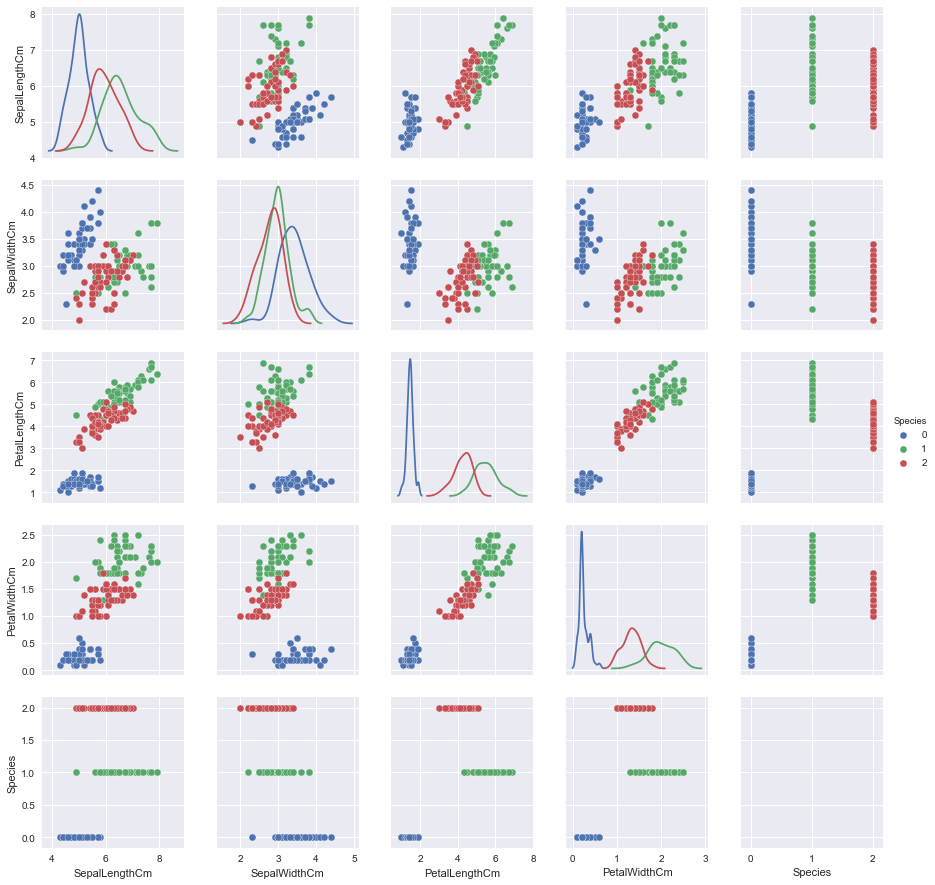

In [23]:
sns.pairplot(Source,hue = 'Species', diag_kind='kde')

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [33]:
target_names = [0,1,2]

In [41]:
Y = pandas.DataFrame(Source["Species"])
X = Source.loc[:, ~Source.columns.isin(['Species'])]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=100)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [72]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, Y_train)
Y_predict = KNN.predict(X_test)
metrics.accuracy_score(Y_test, Y_predict)

0.9354838709677419

In [73]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, Y_train)
Y_predict = KNN.predict(X_test)
metrics.accuracy_score(Y_test, Y_predict)

0.9354838709677419

In [74]:
KNN = KNeighborsClassifier(n_neighbors=9)
KNN.fit(X_train, Y_train)
Y_predict = KNN.predict(X_test)
metrics.accuracy_score(Y_test, Y_predict)

0.9354838709677419

## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [92]:
from sklearn.grid_search import GridSearchCV

k = np.arange(1,20,2)
knn = KNeighborsClassifier()
parameters = {'n_neighbors': k}
GS = GridSearchCV(knn,parameters,cv=10)

In [101]:
Y_train.shape

(121,)

In [102]:
GS.fit(X_train,Y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [103]:
GS.predict(X_test)

array([1, 0, 2, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 2, 2, 1, 0,
       1, 0, 2, 2, 1, 0, 2, 1, 2], dtype=int64)

In [104]:
GS.best_params_

{'n_neighbors': 3}

In [110]:
GS.best_score_

0.9586776859504132

In [106]:
MSE = 1 - GS.best_score_

In [107]:
MSE

0.04132231404958675

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

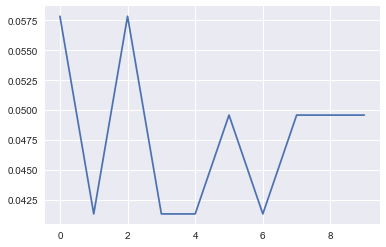

In [118]:
matplot.plot((1-(pandas.DataFrame(GS.grid_scores_))['mean_validation_score']))

# Naive Bayes with Iris Data

In [119]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [120]:
#Check the dataset
print(Y)
print(X)

     Species
0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
..       ...
122        1
123        1
124        1
125        1
126        1
127        1
128        1
129        1
130        1
131        1
132        1
133        1
134        1
135        1
136        1
137        1
138        1
139        1
140        1
141        1
142        1
143        1
144        1
145        1
146        1
147        1
148        1
149        1
150        1
151        1

[152 rows x 1 columns]
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5           1.40           0.2
1              4.9           3.0           1.4

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

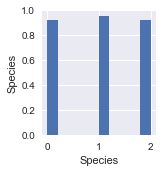

In [123]:
sns.pairplot(Y)

### Question 12 
Find Correlation among all variables and give your insights 

In [ ]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

ignoring this as already done above

### Split data in Training and test set in 80:20.

ignoring this as already done above

### Question 13 
Do Feature Scaling 

In [ ]:
# Use StandardScaler or similar methods

In [129]:
from scipy.stats import zscore
X_train = X_train.apply(zscore)
X_test = X_test.apply(zscore)

### Question 14 
Train and Fit NaiveBayes Model

In [130]:
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB(priors=None)

In [131]:
predicted = model.predict(X_test)

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

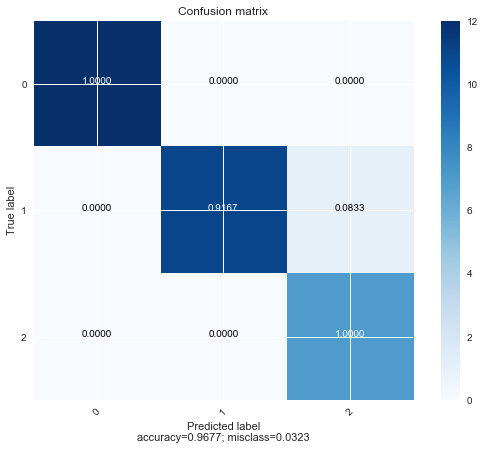

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        12
          1       1.00      0.92      0.96        12
          2       0.88      1.00      0.93         7

avg / total       0.97      0.97      0.97        31



,Model_Performance
Accuracy,0.967742
Recall,"[1.0, 0.9166666666666666, 1.0]"
Precision,"[1.0, 1.0, 0.875]"
f1_Score,"[1.0, 0.9565217391304348, 0.9333333333333333]"


In [140]:
plot_confusion_matrix(Y_test,predicted, target_names,title='Confusion matrix',cmap=None,normalize=True)

# For Practice  - Optional

All the questions from 16 to 20 are for practice.

# Using SVM with Diebetes Dataset

In [ ]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 16 
Read the input file 'Diabetes.csv' using Pandas and check it's column names.

Check dimension of dataset.

Check distribution of dependent variable, Outcome and plot it.


In [ ]:
# Eye ball the imported dataset

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [ ]:
# Check data types and info of dataset

# Question 17 
Check data distribution using summary statistics and provide your findings.

Do correlation analysis and bivariate viualization with Insights


# Question 18 
Do train and test split. 
Optionally - You can do with stratify sampling(optional) on Outcome variable to maintain the distribution of dependent variable

# Question 19 
Train Support Vector Machine Model(1 Marks)

In [ ]:
# use from sklearn.svm import SVC

In [ ]:
# your insights

# Question 20
Scale the data points using MinMaxScaler

Fit SVM Model on Scale data and give your observation

#we can try increasing either C or gamma to fit a more complex model.

# Optional Question - 
Try improving the model accuracy using C=1000 (1 Marks)

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [ ]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [ ]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [ ]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [ ]:
gs.fit(X_train_scaled, y_train) 

In [ ]:
gs.best_estimator_

In [ ]:
gs.best_score_ 